# Lesson four examples

In this file, I will provide many examples on collecting textual data from different sources. Specifically, I will introduce the tasks and the codes.

## Task 1: Collect scientific papers from ACM Digital Library  

Task description: 

The annual SIGIR conference is the major international forum for the presentation of new research results, and the demonstration of new systems and techniques, in the broad field of information retrieval (IR). It has been held 44 times since 1971. Every year, after the meeting, a conference proceeding will be published with more than 200 papers in information retrieval. Since SIGIR is the most important conference in IR, the SIGIR proceddings is a very good resource to understand "how the research topics changed over years in the information retrieval field?". A set of sub-questions need to be answered:

1.	To analyze the original article (based on 5000 original articles)

1.1 The author distribution

1.2	The institution distribution

1.3	The keywords distribution (extract from pdf, will conduct by others)

1.4	The field of 

1.5	The topic distribution (from the json files)

1.6	Topic modeling

1.7	Author analysis (deeper):  the most influential authors and their co-authors. Number of articles for each author/their co-authors, and the topics 

1.8	Collaboration networks

1.9	Download analysis

1.10	Average number of citations for each article

2.	To analysis the citation data (Based on all the citation data)

2.1	The author distribution of all the citations

2.2	The institution distribution of all the citations

2.3	The venue distribution of all the citations

2.4	The intent distribution

2.5	The influential citation counts analysis 

2.6	The topics of all the citation data (Based on the citation article title)

2.7	 The citation context analysis (citation functions)

Until 2020, there are about 5000 research papers published in SIGIR conference, we want to collect all the papers (about 5000 papers), their references (about 150,000) and their citations (about 1,000,000) for further analysis. 

Question 1: How to we find all the original 5000 papers?

ACM Digital Library Proceedings: https://dl.acm.org/proceedings

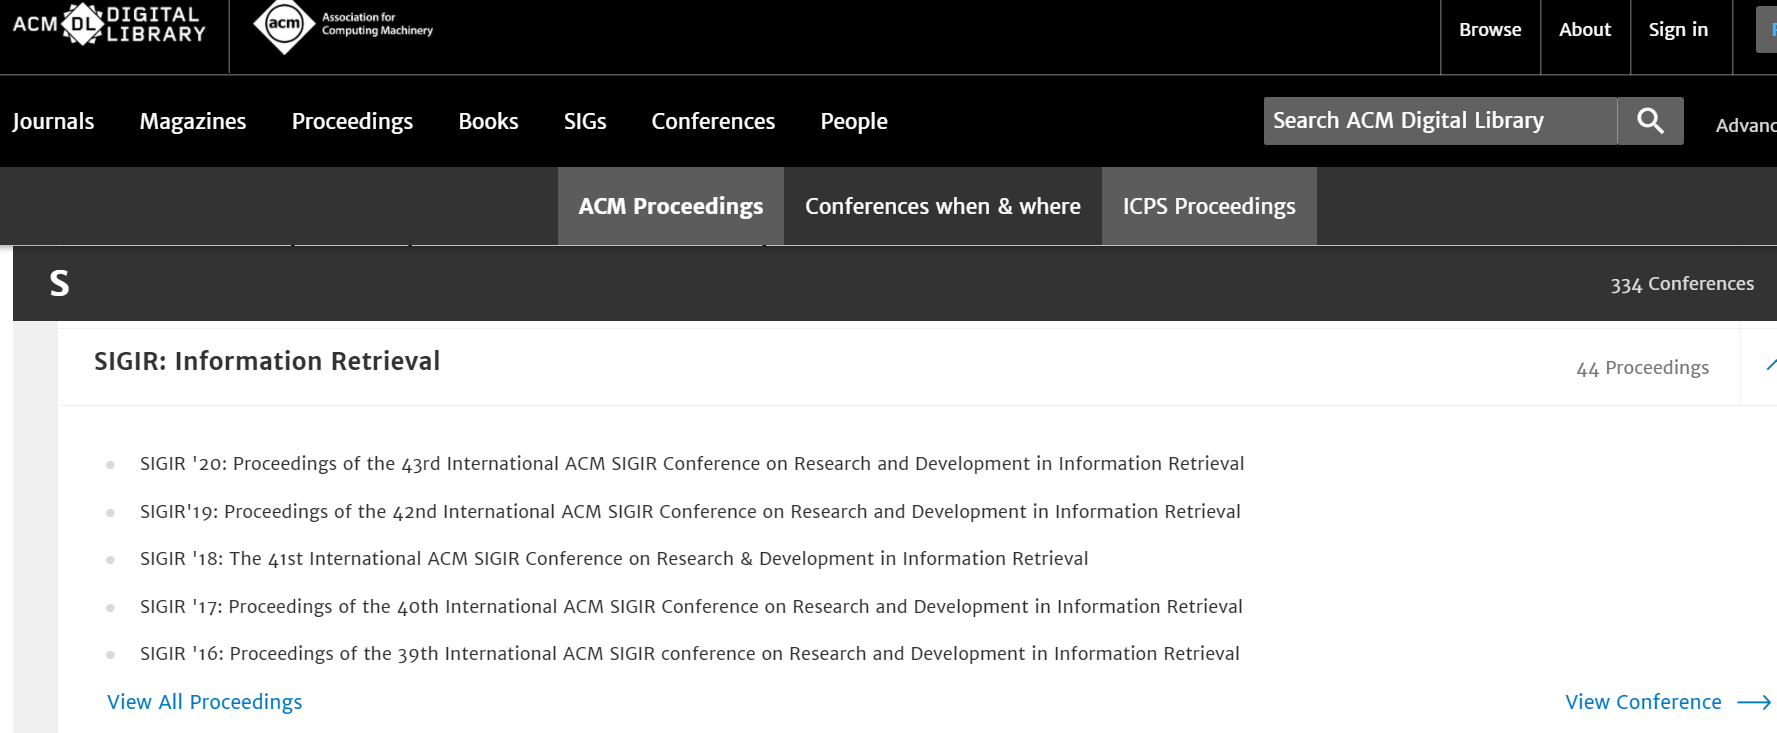

For each proceeding, we would like to collect all the papers (2020 as example): https://dl.acm.org/doi/proceedings/10.1145/3397271

The article information we want to collect include: 'article_type', 'article_title', 'article_author', 'article_year','article_id','article_abstract','total_citation','total_download','pdf_link'. Or any other information available and needed.

How? Let's see the code blew:

In [3]:
# @Time    : 9/14/2020 10:25 AM
# @Author  : Haihua
# @Contact : haihua.chen@unt.edu

from selenium import webdriver
import pandas as pd
import re
from selenium.common.exceptions import NoSuchElementException


def sigir_proceeding(base_url, proceeding_ids):
    driver = webdriver.Chrome(r'C:\Users\hhc0025\PycharmProjects\INFO5731\src\SIGIR_Data\chromedriver.exe')
    # comments = pd.DataFrame(columns=['article_type', 'article_title', 'article_author', 'article_year','article_id','article_abstract','total_citation','total_download','pdf_link'])
    for proceeding_id in proceeding_ids:
        comments = pd.DataFrame(
            columns=['article_type', 'article_title', 'article_author', 'article_year', 'article_id',
                     'article_abstract', 'total_citation', 'total_download', 'pdf_link'])
        proceeding_year = proceeding_id[0]
        proceeding_url = base_url + proceeding_id[1]
        # print(proceeding_url)
        driver = webdriver.Chrome(
            'C://Users//hhc0025//PycharmProjects//INFO5731//src//Lesson4_Collecting_Data//IMDB_Review//driver//chromedriver')
        driver.get(proceeding_url)
        sessions = driver.find_element_by_xpath("/html/body/div[1]/div/main/div[4]/div/div[2]/div[1]/div[1]/div[2]/div/div")
        all_sessions = sessions.text.split('\n')
        print(len(all_sessions))
        for i in range(len(all_sessions)):
            session_url = proceeding_url+"?tocHeading=heading"+str(i+1)
            # print(session_url)
            driver.get(session_url)
            # get the article list under each session
            articles = driver.find_elements_by_class_name("issue-item-container")
            for article in articles:
                # article type information
                article_type = article.find_element_by_class_name("issue-heading").text
                print(article_type)
                if article_type == 'SECTION':
                    continue
                else:
                    # article meta-information
                    article_information = article.find_element_by_class_name("issue-item__content").text.split('\n')
                    print(article_information)
                    # article title
                    article_title = article_information[0]
                    # article author
                    article_author = article_information[1]
                    # article year
                    if len(re.findall(r'2\d\d\d', article_information[2])) > 0:
                        article_year = re.findall(r'2\d\d\d', article_information[2])[0]
                    else:
                        article_year = ''
                    # print(article_year)

                    # article doi
                    if len(re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',
                                      article_information[2])) > 0:
                        article_url = \
                            re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',
                                       article_information[2])[0]
                    else:
                        article_url = ''
                    # print(article_url)
                    # abstract
                    if len(article_information)>3:
                        article_abstract = article_information[3]
                    else:
                        article_abstract = ''
                    # citation count
                    if len(article_information)>4:
                        total_citation = article_information[4]
                    else:
                        total_citation = ''
                    # download count
                    if len(article_information)>5:
                        total_download = article_information[5]
                    else:
                        total_download = ''
                    # download_link
                    try:
                        pdf_link = article.find_element_by_class_name("btn--icon.simple-tooltip__block--b.red.btn")
                        if pdf_link != None:
                            download_link = pdf_link.get_attribute('href')
                            print(download_link)
                        else:
                            download_link = ''
                    except NoSuchElementException:
                        download_link = ''
                    comments.loc[len(comments)] = [article_type, article_title, article_author,article_year,article_url,article_abstract,total_citation,total_download,download_link]
        print(comments)
        comments.to_csv(str(proceeding_year)+'_sigir_article_information.csv')


if __name__ == "__main__":
    proceeding_ids = [[2020,'10.1145/3397271']]
#     proceeding_ids = [[2002,'10.1145/564376'],[2003,'10.1145/860435'],[2004,'10.1145/1008992'],[2005,'10.1145/1076034'], 
#                       [2006,'10.1145/1148170'],[2007,'10.1145/1277741'], [2008,'10.1145/1390334'],[2009,'10.1145/1571941'],
#                       [2010,'10.1145/1835449'],[2011,'10.1145/2009916'],[2012,'10.1145/2348283'],[2013,'10.1145/2484028'],
#                       [2014,'10.1145/2600428'],[2015,'10.1145/2766462'],[2016,'10.1145/2911451'],[2017,'10.1145/3077136'],
#                       [2018,'10.1145/3209978'],[2019,'10.1145/3331184'],[2020,'10.1145/3397271']]
    base_url = 'https://dl.acm.org/doi/proceedings/'
    sigir_proceeding(base_url,proceeding_ids)

34
RESEARCH-ARTICLE
['The Next Generation of Neural Networks', 'Geoffrey Hinton', 'July 2020, pp 1https://doi.org/10.1145/3397271.3402425', 'The most important unsolved problem with artificial neural networks is how to do unsupervised learning as effectively as the brain. There are currently two main approaches to unsupervised learning. In the first approach, … (More)', '0', '677', 'Get Access']
RESEARCH-ARTICLE
['Proof by Experimentation? Towards Better IR Research', 'Norbert Fuhr', 'July 2020, pp 2https://doi.org/10.1145/3397271.3402426', 'The current fight against the COVID-19 pandemic illustrates the importance of proper scientific methods: Besides fake news lacking any factual evidence, reports on clinical trials with various drugs often yield … (More)', '0', '122', '1', 'Get Access']
RESEARCH-ARTICLE
['Coopetition in IR Research', 'Ellen M. Voorhees', 'July 2020, pp 3https://doi.org/10.1145/3397271.3402427', 'Coopetitions are activities in which competitors cooperate for a common

RESEARCH-ARTICLE
['Pairwise View Weighted Graph Network for View-based 3D Model Retrieval', 'Zan Gao, Yin-ming Li, Wei-li Guan, + 3', 'July 2020, pp 129–138https://doi.org/10.1145/3397271.3401054', 'View-based 3D model retrieval has become an important task in both computer vision and machine learning domains. Although deep learning methods have achieved excellent performances on view-based 3D model … (More)', '0', '108', '1', 'Get Access']
RESEARCH-ARTICLE
['Detecting User Community in Sparse Domain via Cross-Graph Pairwise Learning', 'Zheng Gao, Hongsong Li, Zhuoren Jiang, + 1', 'July 2020, pp 139–148https://doi.org/10.1145/3397271.3401055', 'Cyberspace hosts abundant interactions between users and different kinds of objects, and their relations are often encapsulated as bipartite graphs. Detecting user community in such heterogeneous graphs is an essential task … (More)', '0', '135', '1', 'Get Access']
RESEARCH-ARTICLE
['BiANE: Bipartite Attributed Network Embedding', 'Wentao Huang,

['The Cortical Activity of Graded Relevance', 'Zuzana Pinkosova, William J. McGeown, Yashar Moshfeghi', 'July 2020, pp 299–308https://doi.org/10.1145/3397271.3401106', 'Relevance is an essential concept in Information Retrieval (IR). Recent studies using brain imaging have significantly contributed towards the understanding of this concept, but only as a binary notion, i.e. a document being judged as relevant or non-...', '0', '107', '1']
https://dl.acm.org/doi/pdf/10.1145/3397271.3401106
RESEARCH-ARTICLE
['Asymmetric Tri-training for Debiasing Missing-Not-At-Random Explicit Feedback', 'Yuta Saito', 'July 2020, pp 309–318https://doi.org/10.1145/3397271.3401114', 'In most real-world recommender systems, the observed rating data are subject to selection bias, and the data are thus missing-not-at-random. Developing a method to facilitate the learning of a recommender with biased feedback is one of the most ...', '0', '114', '1', 'Get Access']
RESEARCH-ARTICLE
['Beyond User Embedding Matri

['DVGAN: A Minimax Game for Search Result Diversification Combining Explicit and Implicit Features', 'Jiongnan Liu, Zhicheng Dou, Xiaojie Wang, Shuqi Lu, Ji-Rong Wen', 'July 2020, pp 479–488https://doi.org/10.1145/3397271.3401084', 'Search result diversification aims to retrieve diverse results to cover as many subtopics related to the query as possible. Recent studies showed that supervised diversification models are able to outperform the heuristic approaches, by automatically ...', '0', '111', '1', 'Get Access']
RESEARCH-ARTICLE
['Policy-Aware Unbiased Learning to Rank for Top-k Rankings', 'Harrie Oosterhuis, Maarten de Rijke', 'July 2020, pp 489–498https://doi.org/10.1145/3397271.3401102', 'Counterfactual Learning to Rank (LTR) methods optimize ranking systems using logged user interactions that contain interaction biases. Existing methods are only unbiased if users are presented with all relevant items in every ranking. There is currently ...', '0', '179', '1', 'Get Access']
RESEA

KeyboardInterrupt: 

This is the output looks like, the results will be written to a csv file 

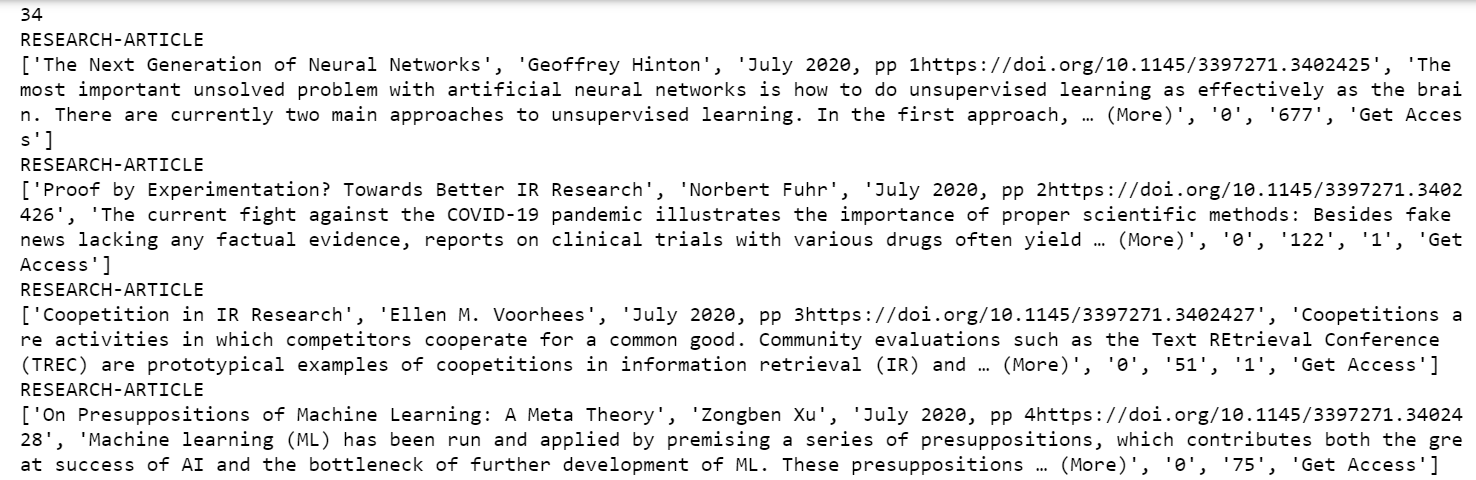

I didn't run the whole program since it will take several minutes. You can test by yourselves! Is that looks interesting and useful?

Then, we would like to download all the pdf files if possible. Here is the code to download pdfs:

In [ ]:
# @Time    : 9/14/2020 10:47 aM
# @Author  : Haihua
# @Contact : haihua.chen@unt.edu

import requests
from clint.textui import progress
# This is the pdf link of the paper, make sure that you connect UNT VPN so that you have the access to download the paper
url = 'https://dl.acm.org/doi/pdf/10.1145/62437.62438?download=true'
r = requests.get(url, stream=True)
with open("paper.pdf", "wb") as Pypdf:
    total_length = int(r.headers.get('content-length'))
    for ch in progress.bar(r.iter_content(chunk_size = 2391975), expected_size=(total_length/1024) + 1):
        if ch:
            Pypdf.write(ch)

Question 2: How to get the reference data and citation data?

After investigation, we figure out semantic scholar should be the perfect database to collect these information with the article dois we collected above. Let see how it works:

DOI example: "3077136.3084372"

Introduction to Semantic Scholar: A free, AI-powered research tool for scientific literature (https://www.semanticscholar.org/)
Semantic Scholar API: Semantic Scholar provides a RESTful API for convenient linking to Semantic Scholar pages and pulling information about individual records on demand (https://api.semanticscholar.org/)

How to use Semantic Scholar API: https://api.semanticscholar.org/[Paper Identifier]
Accessible Paper Identifiers and Examples:

S2 Paper ID : https://api.semanticscholar.org/0796f6cd7f0403a854d67d525e9b32af3b277331
DOI : https://api.semanticscholar.org/10.1038/nrn3241
ArXiv ID : https://api.semanticscholar.org/arXiv:1705.10311
MAG ID : https://api.semanticscholar.org/MAG:112218234
ACL ID : https://api.semanticscholar.org/ACL:W12-3903
PubMed ID : https://api.semanticscholar.org/PMID:19872477
Corpus ID : https://api.semanticscholar.org/CorpusID:37220927

OK, let's see an example of our SIGIR papers. To get paper information of paper "10.1145/2348283.2348407 (Title: Rhetorical relations for information retrieval, SIGIR 2012)" (json format, I talked json format in lesson three, do you remember what is the format looks like?):

https://api.semanticscholar.org/v1/paper/10.1145/2348283.2348407. The json data looks like this:

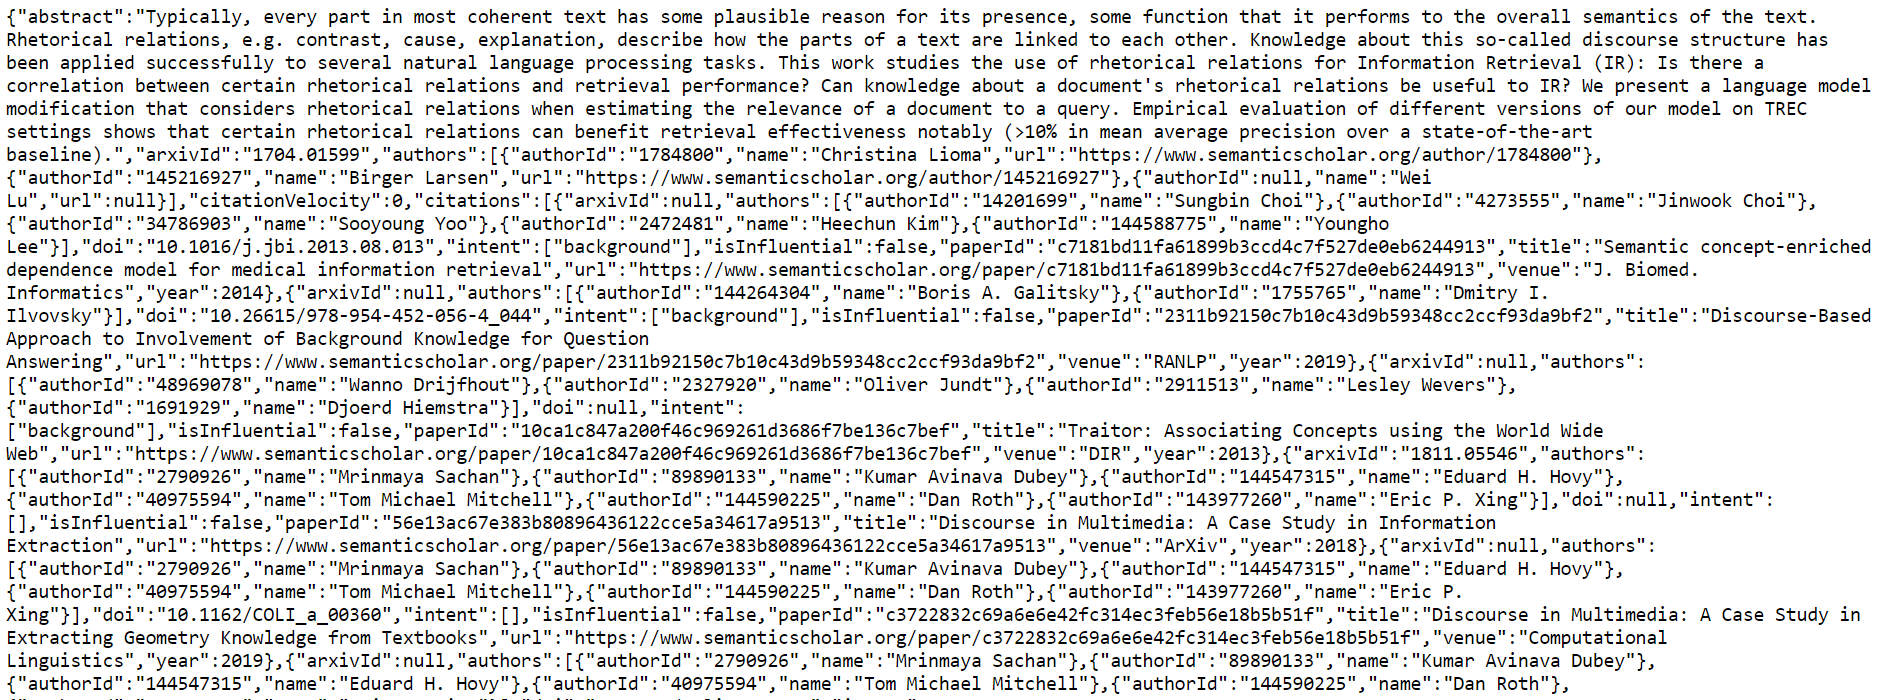

We can see that the reference information and citation information are included in the file, that's great! Then how to parse the citation and the reference information? The code blew we download the json file. Please finish the code of parsing the needed content from the json file by yourself, I will release the reference answer later!

In [7]:
# @Time    : 9/14/2020 11:30 aM
# @Author  : Haihua
# @Contact : haihua.chen@unt.edu

import urllib.request
from bs4 import BeautifulSoup
import json

with urllib.request.urlopen('https://api.semanticscholar.org/v1/paper/10.1145/2348283.2348407') as f:
    webpage = f.read()
    soup = BeautifulSoup(webpage)
#     print (soup.prettify())
    text = soup.p.text
    print(text)
    with open('2348407-meta.txt', 'w') as outfile:
        json.dump(text, outfile)

{"abstract":"Typically, every part in most coherent text has some plausible reason for its presence, some function that it performs to the overall semantics of the text. Rhetorical relations, e.g. contrast, cause, explanation, describe how the parts of a text are linked to each other. Knowledge about this so-called discourse structure has been applied successfully to several natural language processing tasks. This work studies the use of rhetorical relations for Information Retrieval (IR): Is there a correlation between certain rhetorical relations and retrieval performance? Can knowledge about a document's rhetorical relations be useful to IR? We present a language model modification that considers rhetorical relations when estimating the relevance of a document to a query. Empirical evaluation of different versions of our model on TREC settings shows that certain rhetorical relations can benefit retrieval effectiveness notably (>10% in mean average precision over a state-of-the-art b

## Task 2: Collect Twitter textual data by using hashtag "#covid19"

Background:
The rapid emergence and spread of the novel corona virus, 2019-nCoV, has alarmed people around
the world. While the possibility of a global pandemic is real, people can take some solace in the
fact that public health officials have at their disposal an array of powerful data collection and
analytics techniques that previous generations lacked. 2019-nCoV may be the most closely
watched virus in the world at the moment. The virus, which causes a pneumonia-like illness that’s
quite similar to the Severe Acute Respiratory Syndrome (SARS) outbreak 2003.

Usually the analysis is done by automatically ingesting public data from more than 10,000 official
and mass media sources in 65 languages, processing the text using natural language processing
(NLP) and machine learning techniques, and summarizing the findings in a concise manner. In our
project we are collecting data from the Twitter and performed Sentiment Analysis.

Research Question:

1. What are the steps Involved in our Research?
2. How can we Identify, Clarify and find a Solution to our Research problem?
3. Which Methods are best fit for our project?
4. What are the Algorithms / Packages recommended for the Analysis of Twitter Data?
5. How does the Sentiment Analysis work on the data we collected and what are the steps involved for processing the Twitter data?

How? What kind of data should be collected?

Based on the hashtage "covid-19", we extracted the most trending hashtags among each week dated from 11th Feb to First week of Aug 2020 based on the count of hashtags in a particular week. This helped us analyze the change in trend of the hashtags every week. Further, we have also worked on extraction of weekly trending hashtags for the countries from which we were getting most of the tweets as in the case of United States.

Package used:

GetOldTweets3: https://github.com/Mottl/GetOldTweets3

Twitter Official API has the bother limitation of time constraints, you can't get older tweets than a week. Some tools provide access to older tweets but in the most of them you have to spend some money before. I was searching other tools to do this job but I didn't found it, so after analyze how Twitter Search through browser works I understand its flow. Basically when you enter on Twitter page a scroll loader starts, if you scroll down you start to get more and more tweets, all through calls to a JSON provider. After mimic we get the best advantage of Twitter Search on browsers, it can search the deepest oldest tweets.

Let's see how to use this package to extract historical data from Twitter. Here is the code 

In [6]:
# Install the package first

!pip install GetOldTweets3

In [8]:
# @Time    : 9/14/2020 12:21 pM
# @Author  : Haihua
# @Contact : haihua.chen@unt.edu

import pandas as pd
import GetOldTweets3 as got

#Function defining all the required fields
def get_twitter_info():
    tweet_df["tweet_text"] = tweet_df["got_criteria"].apply(lambda x: x.text)
    tweet_df["date"] = tweet_df["got_criteria"].apply(lambda x: x.date)
    tweet_df["hashtags"] = tweet_df["got_criteria"].apply(lambda x: x.hashtags)
    tweet_df["link"] = tweet_df["got_criteria"].apply(lambda x: x.permalink)


keyword = "#covid-19"           #Keyword required for search criteria
oldest_date = "2020-04-19"      #oldest date for extraction
newest_date = "2020-04-25"      #Newest date for extraction
locations =["Norwich"]         #Location of the tweet to be extracted

number_tweets =10000            #Number of tweets to be extracted

#get old tweets
tweetCriteria_list = []
for location in locations:    
    try:
        tweetCriteria = got.manager.TweetCriteria().setQuerySearch(keyword).setSince(oldest_date).setUntil(newest_date).setNear(location).setMaxTweets(number_tweets)
        tweetCriteria_list.append(tweetCriteria)
    except:
        continue   
#create twitter info for each city
tweet_dict = {}                   
for criteria, location in zip(tweetCriteria_list, locations):
    tweets = got.manager.TweetManager.getTweets(criteria)
    tweet_dict[location] = tweets
    
#create df
tweet_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in tweet_dict.items() ]))
tweet_df['tweet_count'] = tweet_df.index
tweet_df = pd.melt(tweet_df, id_vars=["tweet_count"], var_name='City', value_name='got_criteria')
tweet_df = tweet_df.dropna()

#extract twitter information
get_twitter_info()
tweet_df = tweet_df.drop("got_criteria", 1)
tweet_df.head()

#export the frame to a csv file
tweet_df.to_csv("UK_results.csv")

In [9]:
tweet_df

,tweet_count,City,tweet_text,date,hashtags,link
0,0,Norwich,I think @OfficialNAPIT email this afternoon wa...,2020-04-24 16:06:57+00:00,#Covid_19 #contracting #nothappy,https://twitter.com/EastElectrical/status/1253...
1,1,Norwich,credit unknown #Covid_19,2020-04-24 15:13:26+00:00,#Covid_19,https://twitter.com/nlp1983/status/12537036031...
2,2,Norwich,#Trump #disinfectant #donottrythisathome Lysol...,2020-04-24 14:36:43+00:00,#Trump #disinfectant #donottrythisathome,https://twitter.com/sampage2015/status/1253694...
3,3,Norwich,Watch this video from an expert - great messag...,2020-04-24 13:24:25+00:00,#Covid_19,https://twitter.com/mrssuecharles/status/12536...
4,4,Norwich,#injectingdisinfectant FCUK me. Heard it all n...,2020-04-24 12:24:30+00:00,#injectingdisinfectant #COVID19 #COVID2019 #co...,https://twitter.com/Shaun_Button_/status/12536...
5,5,Norwich,@FrancesRivera watching in the UK watching how...,2020-04-24 12:20:42+00:00,#coronavirus #Covid_19 #COVID2019 #COVID19 #Fi...,https://twitter.com/Shaun_Button_/status/12536...
6,6,Norwich,Zoom in: World sees a surge in COVID-19 cases ...,2020-04-24 10:44:47+00:00,,https://twitter.com/DennisFrere/status/1253635...
7,7,Norwich,This. #lockdownextension #COVID19 #COVID2019 ...,2020-04-24 10:09:40+00:00,#lockdownextension #COVID19 #COVID2019 #corona...,https://twitter.com/Shaun_Button_/status/12536...
8,8,Norwich,COVID-19 vaccine protects monkeys from new cor...,2020-04-23 19:07:30+00:00,,https://twitter.com/Ajwhall/status/12534001228...
9,9,Norwich,"Really want to know & I believe you can, can y...",2020-04-23 13:02:10+00:00,#coronavirus #Covid_19 #COVID2019 #COVID19 #Fi...,https://twitter.com/Shaun_Button_/status/12533...


We can also extract other information about tweet, for details, we can read the GetOldTweets3 apis: 
https://github.com/Mottl/GetOldTweets3

## Task 3: Collect textual data from general website, such as Wikipedia, Weather website, Amazon product review, IMDB film review, etc. 

We want to extract information about the local weather from the National Weather Service website. Here is the link:
https://forecast.weather.gov/MapClick.php?textField1=33.22&textField2=-97.15#.X1-lnWj0k2x

How? Steps? think about that?


Part one (locate the information we need):

(1) Download the web page containing the forecast.

(2) Create a BeautifulSoup class to parse the page.

(3) Find the div with id seven-day-forecast, and assign to seven_day

(4) Inside seven_day, find each individual forecast item.

(5) Extract and print the first forecast item.

Part two (Extracting information from the page):

As you can see, inside the forecast item tonight is all the information we want. There are 4 pieces of information we can extract:

(1) The name of the forecast item.

(2) The description of the conditions.

(3) A short description of the conditions.

(4) The temperature High.

The output:

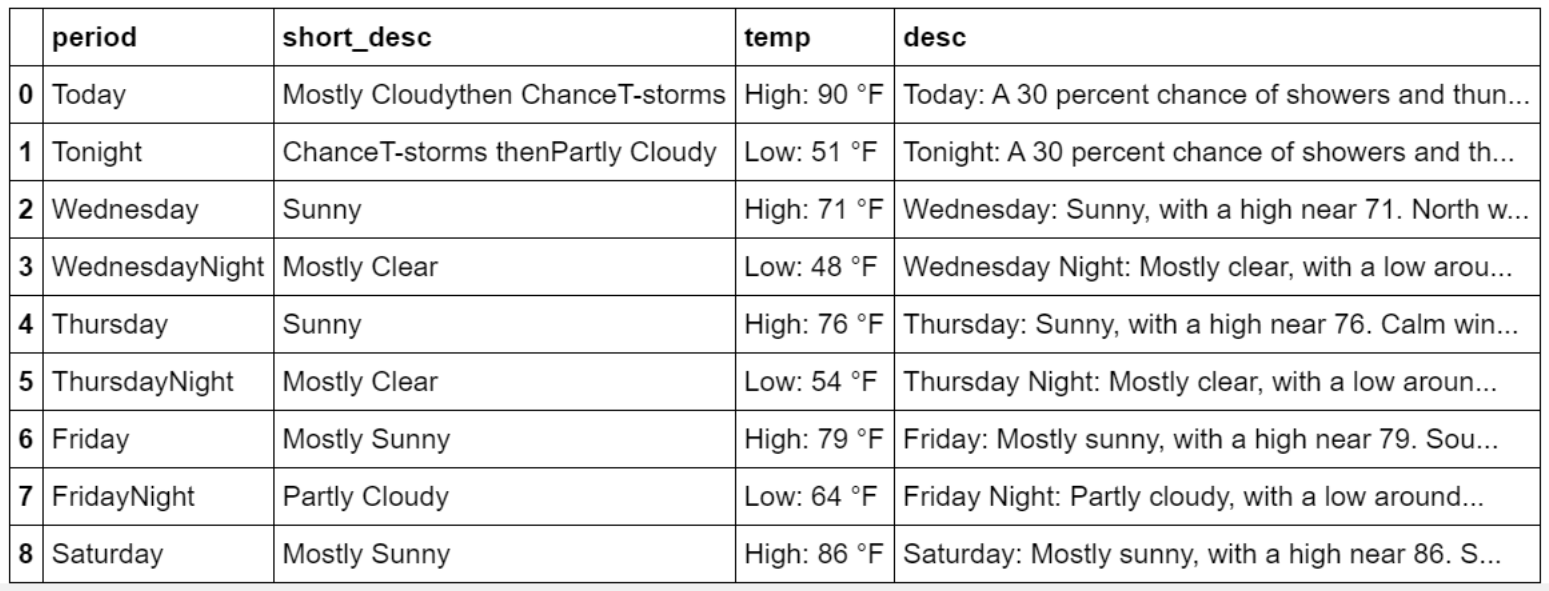


Let's see the code:

In [10]:
# @Time    : 9/14/2020 1:00 pM
# @Author  : Haihua
# @Contact : haihua.chen@unt.edu

import urllib.request

#import the Beautiful soup functions to parse the data returned from the website
from bs4 import BeautifulSoup
import pandas as pd

url = "https://forecast.weather.gov/MapClick.php?textField1=33.22&textField2=-97.15#.XaXfI0ZKjb0"

#Query the website and return the html to the variable 'page'
page = urllib.request.urlopen(url)

#Parse the html in the 'page' variable, and store it in Beautiful Soup format
soup = BeautifulSoup(page)

# print(soup)

# return the section that contains the seven day weather information by using the div "id"
seven_day = soup.find(id="seven-day-forecast")

# Select all items with the class period-name inside an item with the class tombstone-container in seven_day.
# Use a list comprehension to call the get_text method on each BeautifulSoup object.

period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]

weather = pd.DataFrame({
    "period": periods,
    "short_desc": short_descs,
    "temp": temps,
    "desc":descs
})
print(weather)

# write to csv file

weather.to_csv('weather_data.csv')

           period             short_desc         temp  \
0   ThisAfternoon           Partly Sunny  High: 84 °F   
1         Tonight          Mostly Cloudy   Low: 70 °F   
2         Tuesday           Partly Sunny  High: 86 °F   
3    TuesdayNight          Partly Cloudy   Low: 69 °F   
4       Wednesday         ChanceT-storms  High: 86 °F   
5  WednesdayNight  Slight ChanceT-storms   Low: 68 °F   
6        Thursday         ChanceT-storms  High: 85 °F   
7   ThursdayNight  Slight ChanceT-storms   Low: 68 °F   
8          Friday                  Sunny  High: 86 °F   

                                                desc  
0  This Afternoon: Partly sunny, with a high near...  
1  Tonight: Mostly cloudy, with a low around 70. ...  
2  Tuesday: Partly sunny, with a high near 86. No...  
3  Tuesday Night: Partly cloudy, with a low aroun...  
4  Wednesday: A 30 percent chance of showers and ...  
5  Wednesday Night: A 20 percent chance of shower...  
6  Thursday: A 40 percent chance of showers 

In [11]:
weather

,period,short_desc,temp,desc
0,ThisAfternoon,Partly Sunny,High: 84 °F,"This Afternoon: Partly sunny, with a high near..."
1,Tonight,Mostly Cloudy,Low: 70 °F,"Tonight: Mostly cloudy, with a low around 70. ..."
2,Tuesday,Partly Sunny,High: 86 °F,"Tuesday: Partly sunny, with a high near 86. No..."
3,TuesdayNight,Partly Cloudy,Low: 69 °F,"Tuesday Night: Partly cloudy, with a low aroun..."
4,Wednesday,ChanceT-storms,High: 86 °F,Wednesday: A 30 percent chance of showers and ...
5,WednesdayNight,Slight ChanceT-storms,Low: 68 °F,Wednesday Night: A 20 percent chance of shower...
6,Thursday,ChanceT-storms,High: 85 °F,Thursday: A 40 percent chance of showers and t...
7,ThursdayNight,Slight ChanceT-storms,Low: 68 °F,Thursday Night: A 20 percent chance of showers...
8,Friday,Sunny,High: 86 °F,"Friday: Sunny, with a high near 86. Northeast ..."


## Task 4: Collect data from Facebook for social network analysis

Similar to Twitter, facebook is another platform for social media analysis, there are many information can be collected about a user from facebook? For example, what kind of information? Your brainstorm: 

There are different methods to collect facebook data. First we can use Facebook Python SDK (https://pypi.org/project/facebook-sdk-python/). However, we need a facebook developer account to access the data, how to apply the account can be found here: Working with Facebook Graph API (https://www.studytonight.com/network-programming-in-python/facebook-graph-api). Mining your own Facebook Account, please find the code here: https://www.studytonight.com/network-programming-in-python/mining-facebook-data. To get more information, we can refer this repository: https://github.com/bonzanini/Book-SocialMediaMiningPython/tree/master/Chap04. 

Blew is an example (However, there some issues with my facebook account, the token cannot be validated), please try yourself.

In [ ]:
import os
import facebook
import json

if __name__ == '__main__':
    token = os.environ.get('EAAOSZBmdTKBMBAIf1FrTGmapagVZAvwdlrwSWNc3EZCOTXQ90Im9u')
    graph = facebook.GraphAPI(token)
    user = graph.get_object("me")
    friends = graph.get_connections(user["id"], "friends")
    print(json.dumps(friends, indent=4))

The second tool is Ultimate-Facebook-Scraper, tool that automates your social media interactions to collect posts, photos, videos, friends, followers and much more on Facebook. Link: https://github.com/harismuneer/Ultimate-Facebook-Scraper.

A bot which scrapes almost everything about a user's Facebook profile including:

(1) uploaded photos

(2) tagged photos

(3) videos

(4) friends list and their profile photos (including Followers, Following, Work Friends, College Friends etc)

(5)and all public posts/statuses available on the user's timeline

(6)NEW: Now you can scrape Facebook group posts.

Data is scraped in an organized format to be used for educational/research purposes by researchers. This scraper does not use Facebook's Graph API meaning there are no rate limiting issues.

This tool is being used by thousands of developers weekly!

I will explain how to run the program!

## Task 5: Collect domian specific textual data (take the legal domain as example)

I want to collect some legal cases for text classification, I need the text and category information. If I use keyword and directly download the data from courtlistener (https://www.courtlistener.com/), a non-profit legal search engine, I cannot get the category information. Therefore, I download the data from westlaw, a business legal search engine, which has cases under each category. However, since this is a business legal search engine, **we don't have the access to get the full text**. Therefore, I donwloaded the metadata first, then search from courtlistener by using the metadata to get the full text. The metadata can be accessed here: https://github.com/unt-iialab/INFO5731_FALL2020/blob/master/web_scraping_examples/Criminal_Law_Cases.csv. Write a program to get the full text listed in the csv file and save them into txt files.  

In [14]:
# @Time    : 9/14/2020 3:00 pM
# @Author  : Haihua
# @Contact : haihua.chen@unt.edu

from __future__ import unicode_literals

import time
import  urllib.request
from bs4 import BeautifulSoup
import string
import pandas as pd
import codecs
import urllib.parse


# read csv file from local, return the title list and transfer the titles into queries
from requests import HTTPError


def westlaw_data_process(filepath):
    df = pd.read_csv (filepath,error_bad_lines=False)
    query_list = []
    title_list = df['Title'].tolist()
    print(title_list)
    for item in title_list:
        case_title = str (item)
        query = case_title.translate (str.maketrans ('' , '' , string.punctuation)).replace (" " , "+")
        query_list.append(query)
    print(query_list)
    return query_list

# Given an url, download the webpage (only the case content part) into local
def webpage_download(savepath, url):
    connection = urllib.request.urlopen(url)
    webpage_obj = connection.read ()
    webpage = webpage_obj.decode ('ascii','ignore')
    soup = BeautifulSoup(webpage,'html.parser')
    raw_case = soup.find ("article" , {"class":"col-sm-9"})
    case_infor = soup.find("h2" , {"class":"inline"})
    case_title = case_infor.get_text().translate (str.maketrans ('' , '' , string.punctuation))
    clean_case_title = case_title[0:50]
    # print(case_infor.get_text())
    string_case = str(raw_case)
    print(string_case)
    if type(string_case) == str:
        try:
            # string_case_clean = re.sub(r'[^\x00-\x7F]+',' ', string_case)
            string_case_clean = ''.join ([i if ord (i) < 128 else ' ' for i in string_case])
            print(string_case_clean)
            file1 = codecs.open (savepath+"//"+clean_case_title+".txt", "w", encoding="utf-8",errors='ignore')
            file1.write (string_case_clean)
            file1.close()
        except UnicodeEncodeError:
            pass
    else:
        print("unicode value")

# use the query accessed from the csv file to search from courtlistener
def courtlistener_crawler(savepath, filepath):
    query_list = westlaw_data_process(filepath)
    for query in query_list:
        query_search_url = "https://www.courtlistener.com/?type=o&q=&type=o&order_by=score+desc&case_name="+query+"&stat_Precedential=on"
        try:
            connection = urllib.request.urlopen(query_search_url)
            print(connection)
            webpage_obj = connection.read()
            webpage = webpage_obj.decode ('utf-8')

            # print (webpage)
            soup = BeautifulSoup(webpage,'html.parser')
            results = soup.find ("div" , {"id":"search-results"})
            # print(results)

            # tag_soup = results.article
            tag_soup = results.find_all("article")
            print(tag_soup)
            print(len(tag_soup))
            if len(tag_soup)>=1:
                for item in tag_soup:
                    tags = item.find_all ("a",{"class":"visitable"})
                    print(tags)
                    for tag in tags:
                        paper_url = tag.get ('href')
                        # print(paper_url)
                        absolute_paper_url = "https://www.courtlistener.com/"+paper_url
                        print(absolute_paper_url)
                        webpage_download (savepath,absolute_paper_url)
                        time.sleep(10)
            else:
                print("no results found")
        except HTTPError as e:
            if e.code == 429:
                time.sleep (3600)


if __name__ == '__main__':
    # change the path to where you want to save the data
    savepath = r"C:\UNT_Study\data_collection\infor5731_criminal"
    # change the path to where the files you have saved
    filepath = "https://raw.githubusercontent.com/unt-iialab/INFO5731_FALL2020/master/web_scraping_examples/Criminal_Law_Cases.csv"
    courtlistener_crawler (savepath , filepath)

b'Skipping line 309: expected 13 fields, saw 15\nSkipping line 390: expected 13 fields, saw 14\n'


['Adi v. Warden, Giles W. Dalby Facility', 'McShan v. Quarterman', 'Martinez v. U.S.', 'Josey v. Dretke', 'Khalid v. Dretke', 'Escamilla v. Outlaw', 'Tran v. Quintana', 'Guillory v. Director, TDCJ-CID', 'Carbajal-Perez v. U.S.', 'U.S. v. Herrera', 'Savedra v. Dretke', 'Hampton v. Quarterman', 'Jackson v. U.S.', 'Snowden v. Quarterman', 'Mackey v. Dretke', 'U.S. v. Lester', 'In re Enron Corp. Securities, Derivative & "ERISA" Litigation', 'Williams v. Director, TDCJ-ID', 'Haynes v. Brewster', 'Sutherland v. Sutherland', 'U.S. v. Edwards', 'Davis v. Fox', 'Austin v. Quarterman', 'Silva-Trevino v. Watkins', 'Zavala v. Quarterman', 'Williams v. Quarterman', 'Coleman v. Dretke', 'Kingery v. Quarterman', 'Bradford v. Quarterman', 'Hitt v. Quarterman', 'Kadri v. Haro', 'Swiney v. State of Texas', 'Ghosh v. McClure', 'U.S. v. Traylor', 'Morgan v. Quarterman', 'Stevens v. Dretke', 'Drake v. Dretke', 'Mays v. Dretke', 'Patterson v. Dretke', 'Orozco v. Warden, FCI Seagoville', 'Ray v. Quarterman',

[]
0
no results found
[]
0
no results found
[<article>
<h3 class="bottom serif">
<a class="visitable" href="/opinion/109541/united-states-v-martinez-fuerte/?type=o&amp;q=&amp;type=o&amp;order_by=score+desc&amp;case_name=Martinez+v+US&amp;stat_Precedential=on">
      United States v. Martinez-Fuerte
      (1976)
      </a>
</h3>
<div class="bottom">
<div class="inline-block">
<span class="meta-data-header">Date Filed:</span>
<time class="meta-data-value" datetime="1976-07-06">
          
            July 6th, 1976
          
        </time>
</div>
<div class="inline-block">
<span class="meta-data-header">Status:</span>
<span class="meta-data-value">Precedential</span>
</div>
<div class="inline-block">
<span class="meta-data-header">Citations: </span>
<span class="meta-data-value">1976 U.S. LEXIS 87, 49 L. Ed. 2d 1116, 96 S. Ct. 3074, 428 U.S. 543</span>
</div>
<div class="inline-block">
<span class="meta-data-header">Docket Number:</span>
<span class="meta-data-value">74-1560</span>
</d

<article class="col-sm-9">
<i class="gray fa-star-o bold pointer fa inline" data-target="#modal-save-favorite, #modal-logged-out" data-toggle="modal" id="favorites-star" title="Save this record as a favorite in your profile"></i>
<h2 class="inline">United States<span class="alt"> v. </span>Martinez-Fuerte, 428 U.S. 543</h2>
<div aria-hidden="true" class="modal hidden-print" id="modal-logged-out" role="dialog" tabindex="-1">
<div class="modal-dialog modal-sm">
<div class="modal-content">
<div class="modal-body">
<button aria-label="Close" class="close" data-dismiss="modal" type="button"><span aria-hidden="true">×</span></button>
<h2 class="text-center">Please Sign In or Register</h2>
<p class="v-offset-above-2">
<a class="btn btn-primary btn-block btn-lg" href="/sign-in/?next=/opinion/109541/united-states-v-martinez-fuerte/?order_by%3Dscore%2Bdesc%26stat_Precedential%3Don%26type%3Do%26type%3Do%26case_name%3DMartinez%2Bv%2BUS%26">Sign In</a>
<a class="btn btn-default btn-block btn-lg" hr

KeyboardInterrupt: 

By constructing the query, we search the results, from the results, we collect the files we want. Is it quite interesting and useful? 

Now it's your turn to do more practice!
In terms of which method to use, it depends on your experiences, so practice, practice, and practice!!! 